In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [2]:
iris = datasets.load_iris()


In [3]:
X = iris.data[:100, :2]  # We only take the first two features.
y = iris.target[:100]  # We take the first 100 instances, which only belong to the first two classes.


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = LogisticRegression()


In [6]:
model.fit(X_train, y_train)


LogisticRegression()

In [7]:
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)


Coefficients:  [[ 2.88868978 -2.72919824]]
Intercept:  [-7.07994242]


In [8]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)


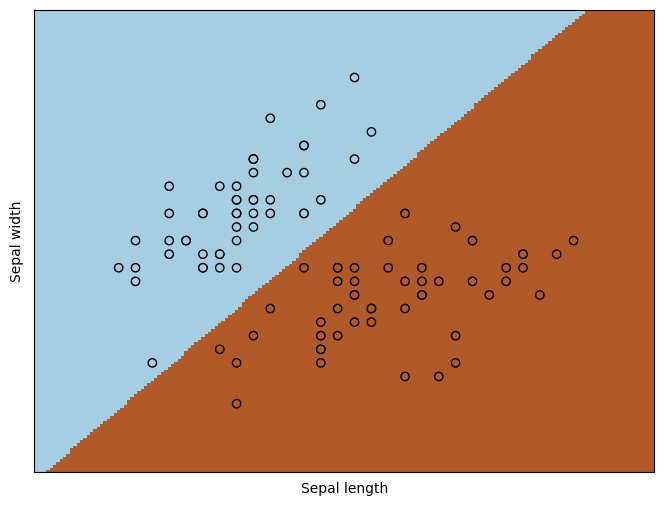

In [9]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


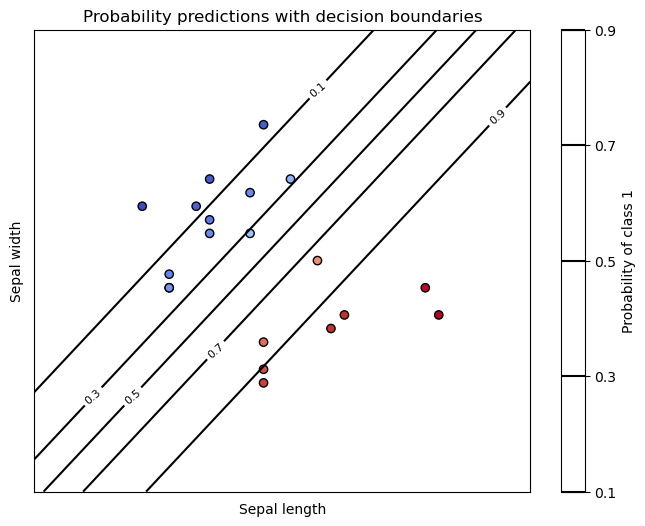

In [15]:
# Step 11 - Plotting the probabilities with contour lines
plt.figure(2, figsize=(8, 6))

# Probabilities of class 1 for each point in the grid
Z_prob = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_prob = Z_prob.reshape(xx.shape)

# Scatter plot of the test data, colored by the probability of class 1
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_prob[:, 1], edgecolors='k', cmap=plt.cm.coolwarm)

# Contour plot for levels of probabilities
contour = plt.contour(xx, yy, Z_prob, levels=[0.1, 0.3, 0.5, 0.7, 0.9], colors='k')
plt.clabel(contour, inline=True, fontsize=8)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.colorbar(label='Probability of class 1')
plt.title('Probability predictions with decision boundaries')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [12]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[12  0]
 [ 0  8]]
